In [580]:
from sklearn import datasets

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn import metrics

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans

import seaborn as sns

import pylab as plot

In [521]:
# df = pd.read_csv("HackerRank-Numeric.csv")
df_value = pd.read_csv("HackRankDataset.csv")

In [522]:
df_value.head()

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


In [530]:
df_country_gender_lang = df_value[['CountryNumeric2','q3Gender', 'q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython', 'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo', 'q25LangSwift', 'q25LangR']]

In [531]:
df_country_gender_lang.columns = ['Country', 'Gender', 'C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

In [532]:
df_country_gender_lang.head()

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,South Korea,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,Ukraine,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Malaysia,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,Curaçao,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,NaN,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN


In [533]:
is_female = df_country_gender_lang['Gender'] == 'Female'
is_male = df_country_gender_lang['Gender'] == 'Male'

In [534]:
df_female = df_country_gender_lang[is_female]
df_male = df_country_gender_lang[is_male]

In [535]:
df_female.head()
df_male.head()

,Country,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
1,Ukraine,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Curaçao,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
5,United States,Male,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,United States,Male,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,United States,Male,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN


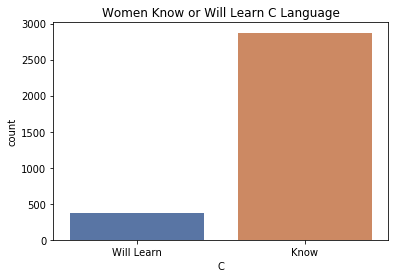

In [536]:
sns.countplot(data=df_female, x="C")
plt.title("Women Know or Will Learn C Language")
plt.show()

In [537]:
df_lang_female = df_female[['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']]
df_lang_male = df_male[['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']]
df_c_female = df_female['C']
df_c_male = df_male['C']

In [538]:
df_lang_female.head()
df_lang_male.head()

,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
1,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
5,Will Learn,Will Learn,Know,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Know
6,Know,Know,Will Learn,Will Learn,NaN,Know,Will Learn,NaN,NaN,Will Learn
7,NaN,Know,NaN,Know,NaN,Will Learn,NaN,NaN,NaN,NaN


In [616]:
df_langmelt_female = pd.melt(df_lang_female)
df_langmelt_male = pd.melt(df_lang_male)
df_langmelt_female

,variable,value
0,C,Will Learn
1,C,Will Learn
2,C,NaN
3,C,NaN
4,C,NaN
5,C,Know
6,C,NaN
7,C,NaN
8,C,Know
9,C,NaN


In [540]:
df_langmelt_female
df_langmelt_female.dropna(subset=['value'], inplace=True)
df_langmelt_female
isKnown = df_langmelt_female['value'] == 'Know'
known = df_langmelt_female[isKnown]
willLearn = df_langmelt_female['value'] == 'Will Learn'
learn = df_langmelt_female[willLearn]

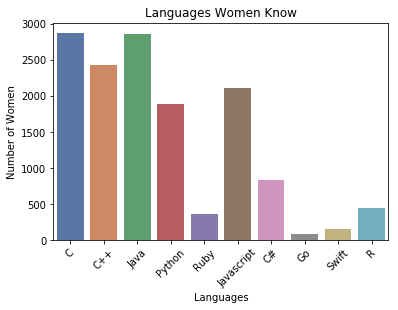

In [541]:
chart1 = sns.countplot(data=known, x="variable")
plt.title("Languages Women Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")
plt.show()

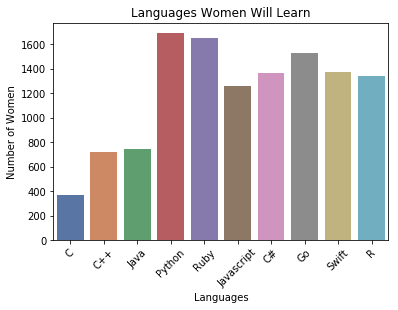

In [542]:
chart2 = sns.countplot(data=learn, x="variable")
plt.title("Languages Women Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
plt.show()

In [543]:
df_langmelt_male
df_langmelt_male.dropna(subset=['value'], inplace=True)
df_langmelt_male
isKnown = df_langmelt_male['value'] == 'Know'
known = df_langmelt_male[isKnown]
willLearn = df_langmelt_male['value'] == 'Will Learn'
learn = df_langmelt_male[willLearn]

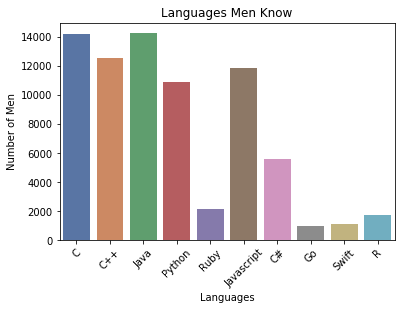

In [544]:
chart1 = sns.countplot(data=known, x="variable")
plt.title("Languages Men Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
plt.show()

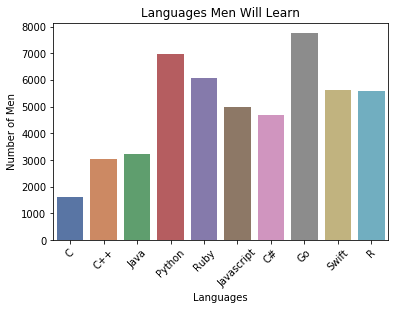

In [545]:
chart2 = sns.countplot(data=learn, x="variable")
plt.title("Languages Men Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
plt.show()

In [558]:
# Pie chart showing percentage of Men and Women who know which language
# subplots showing percentage of men and women starting with C
# C C++ Java Python Ruby
# Javascript C# Go Swift R


Text(0.5,1,'R')

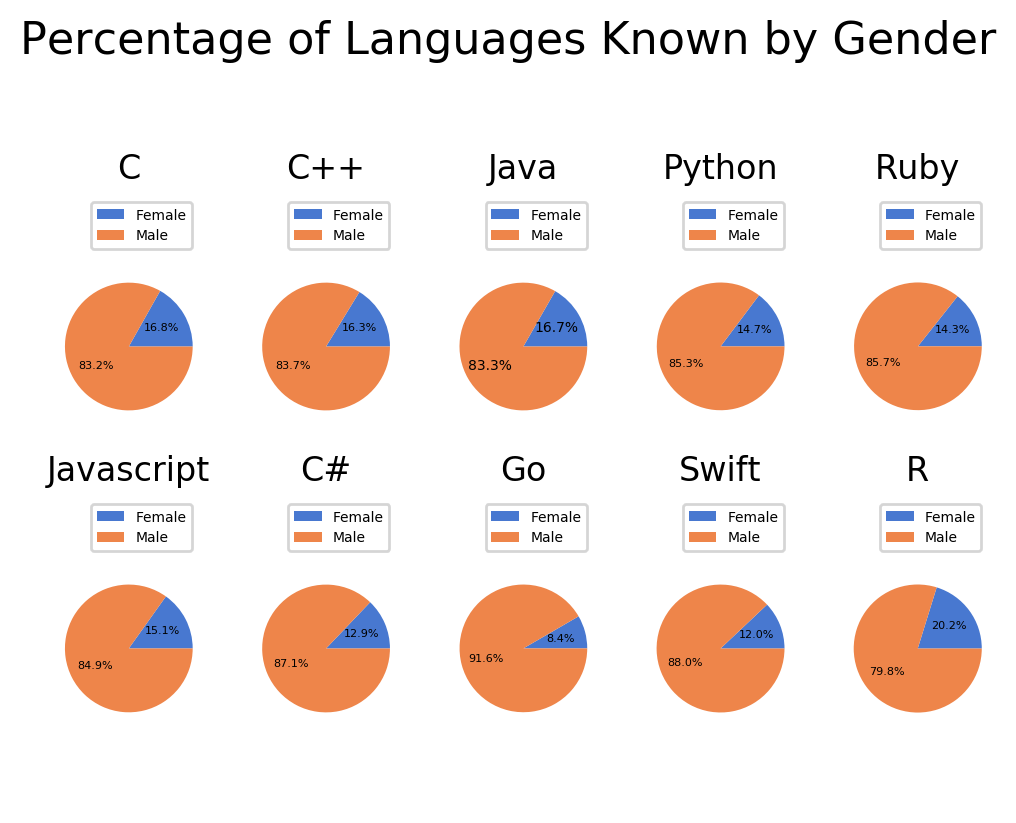

In [615]:
fig = plt.figure(dpi=200)
sns.set_palette("muted")
fig.subplots_adjust(hspace=0, wspace=0.4)
fig.suptitle('Percentage of Languages Known by Gender', fontsize=16, y=1.1)


# C Pie Chart
plt.subplot(2, 5, 1)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['C']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['C']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('C')

# C++ Pie Chart
plt.subplot(2, 5, 2)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['C++']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['C++']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('C++')

# Java Pie Chart
plt.subplot(2, 5, 3)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Java']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Java']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 5})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Java')


# Python Pie Chart
plt.subplot(2, 5, 4)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Python']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Python']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Python')

# Ruby
plt.subplot(2, 5, 5)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Ruby']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Ruby']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Ruby')

# Javascript
plt.subplot(2, 5, 6)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Javascript']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Javascript']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Javascript')

# C#
plt.subplot(2, 5, 7)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['C#']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['C#']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('C#')

# Go
plt.subplot(2, 5, 8)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Go']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Go']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Go')

# Swift
plt.subplot(2, 5, 9)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['Swift']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['Swift']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('Swift')

# R Pie Chart
plt.subplot(2, 5, 10)
plt.pie([
        df_country_gender_lang[(df_country_gender_lang['R']=='Know') &(df_country_gender_lang['Gender']=="Female")].shape[0],
        df_country_gender_lang[(df_country_gender_lang['R']=='Know') &(df_country_gender_lang['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df_country_gender_lang['Gender'], loc=1, prop={'size': 5})
plt.title('R')